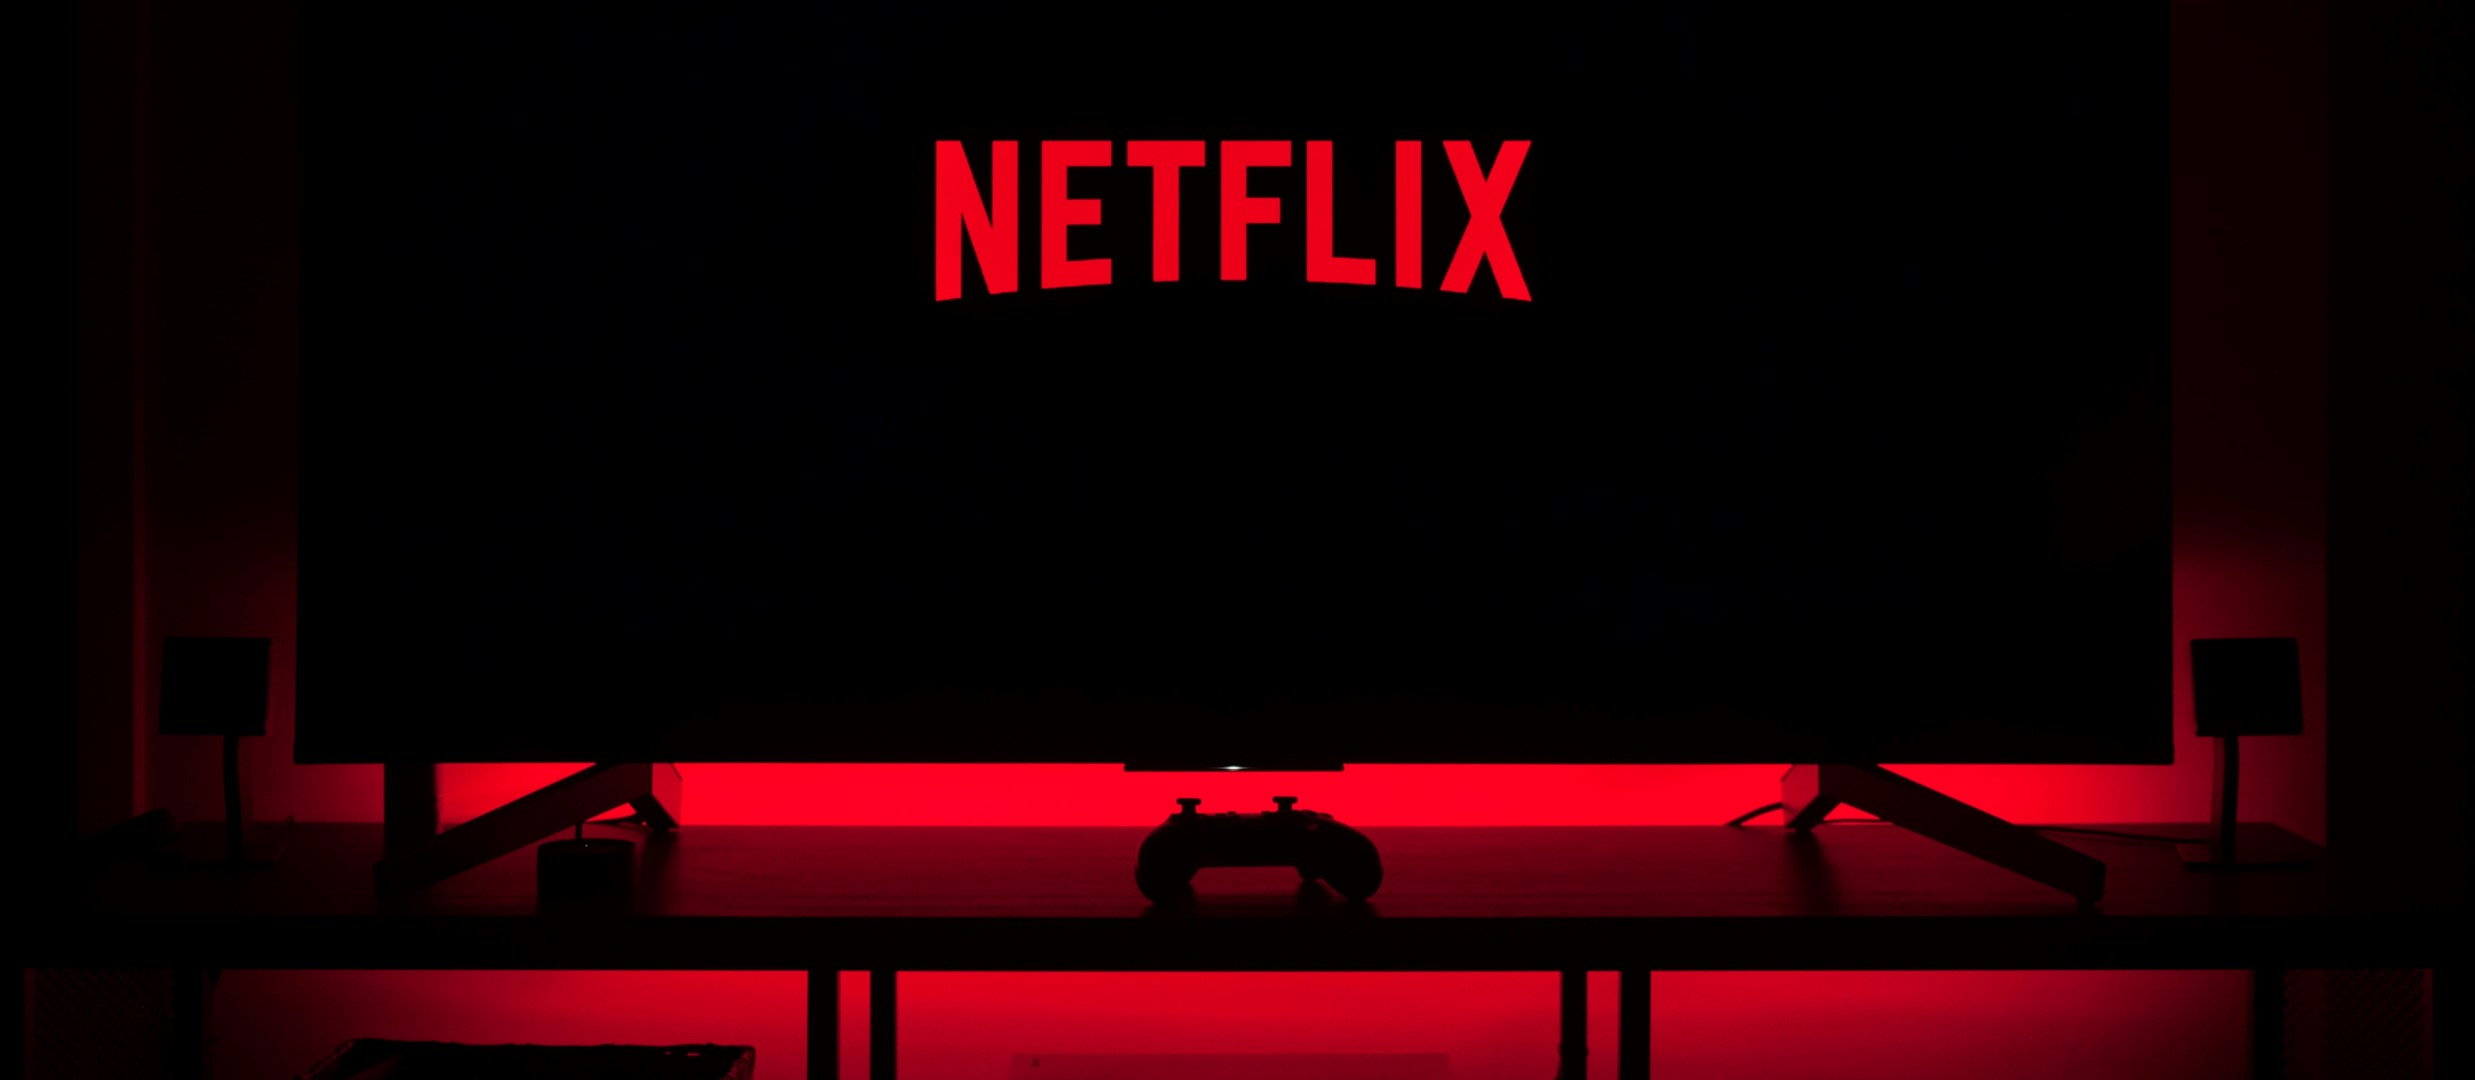

## **Netflix Dataset**
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.


## **Business Problem**

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

## **Objectives of the Project**

- Perform EDA on the given dataset and find insights.
- Provide Useful Insights and Business recommendations that can help the business to grow.

# **Introduction:-**

In this notebook, I'll give an Exploratory Data Analysis of the Netflix dataset. We will explore the data and hopefully bring some insights.

We will explore:-
- How has the number of movies released per year changed over the last 20-30 years?

- Comparison of tv shows vs. movies

-  What is the best time to launch a TV show?

-  Analysis of actors/directors of different types of shows/movies.

- Does Netflix has more focus on TV Shows than movies in recent years.

- Understanding what content is available in different countries.

- Which genre movies are more popular or produced more.

- Find After how many days the movie will be added to Netflix after the release of
the movie.




### **The Outline of this notebook is as follows**

1. **Basic Data Exploration**

- Feature Exploration
- Summary Statistics

2. **Data Cleaning**

- Null Value Analysis
- Checking Dublicate Values.

3. **Exploratory data analysis (What is the Story Of Data)**

###  **Importing Libraries and Loading the Dataset**


In [1]:
# importing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import wordcloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
df = pd.read_csv("/content/netflix_titles.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/netflix_titles.csv'

# **1. Basic Data Exploration**
- Feature Exploration
- Summary Statistics
- Un-nesting the columns.

## a.) Feature Exploration

First, let us look at a quick peek of what the first fice rows in the data has in store for us and what features we have

In [ ]:
# first 5 rows
df.head()

In [ ]:
df.columns

In this dataset we have,
- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description.

**Next, let us take a look at how large the data is:**

In [ ]:
df.shape

We have 8807 Entity from 12 Feature

**Okay. Lets look what types of data we have:-**

In [ ]:
# Data types in columns
df.info()

We have:
- 11 Categorical Feature.
- 1 Numerical Feature.

## **b.) Summary Statistics**
Here we can see basic statistics in the data.

In [ ]:
# converting Dtype of date_added column to date_type
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
# for datetime feature
df.describe(include = 'number').T

Content release year analysis looks like this:-
- We have content between the year from 1925 and 2021.

- We have the mean year 2014.
- We have the median year 2017.

In [ ]:
# summary statistics for categorical feature.
df.describe(include = 'object').T

## c.) Un-nesting the columns.

**Dealing with comma seperated values.**

To check whether a column in data contains "," {comma} which could be containing data in nested form we can use syntax .str.contains for identifying them summing up would help in knowing the number of column having them.

In [ ]:
def count_comma_separated_values(df):
    counts = {}
    for column in df.columns:
      if (df[column].dtype == 'O'):
        # Convert non-string columns to strings and handle null values
        column_as_string = df[column].astype(str).fillna('')
        # Use str.contains(", ") to count comma-separated values in each column
        column_counts = column_as_string.str.contains(", ").sum()
        if column_counts > 0:
          counts[column] = column_counts
    return counts

count_comma_separated_values(df)


We will create a seperate df for every column that we will unnest now.

### df_director

In [ ]:
df_director = df.copy()
df_director['director'] = df_director['director'].str.split(", ")
df_director = df_director.explode("director", ignore_index=True)
df_director.shape

### df_cast

In [ ]:
df_cast = df.copy()
df_cast['cast'] = df_cast['cast'].str.split(", ")
df_cast = df_cast.explode("cast", ignore_index=True)
df_cast.shape

### df_country

In [ ]:
df_country = df.copy()
df_country['country'] = df_country['country'].str.split(", ")
df_country = df_country.explode("country", ignore_index=True)
df_country.shape

### df_listed_in

In [ ]:
df_listed_in = df.copy()
df_listed_in['listed_in'] = df_listed_in['listed_in'].str.split(", ")
df_listed_in = df_listed_in.explode("listed_in", ignore_index=True)
df_listed_in.shape

# **2. Data Cleaning**
- Null Value Analysis
- Checking duplicate values.

## **a.) Null value Analysis**

In [ ]:
df.isnull().values.any()

We have null values in dataset, but where?

In [ ]:
# which features have how much null values?
msno.matrix(df)

As we can see, the missing values now become much more apparent and clear when we visualize it. White bands shows us missing data values and dark gray ones are non - missing data.

- We're seeing that dataset a lot of missing director data,
- And we have missing data on cast and country
- We have some missing data on duration.

This visualization is really good seeing big picture of missing values. But We need specific number and percentage of missing values.

In [ ]:
def missing_value_table(df, get_null_columns=False):
    # find columns that only have null values
    null_columns = [col for col in df.columns
                    if df[col].isnull().sum() > 0]

    # Null Value counts
    null_counts = df[null_columns].isnull().sum().sort_values(ascending=False)

    # Null Value Percentage
    null_value_rates = (df[null_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    formatted_null_value_rates = null_value_rates.apply(lambda value: f" {str(np.round(value, 2))} %")

    # Null Value Table
    null_df = pd.concat([null_counts, formatted_null_value_rates],
                        axis=1, keys=["Count", "Rate"])
    print(null_df, end="\n")

    if get_null_columns:
        return null_columns


missing_value_table(df)

In [ ]:
# filling the null values with unknown_column_name
df.fillna({'director' : 'Unknown_Director', 'cast': 'Unknown_Cast', 'country': 'Unknown_Country','rating': 'Unknown_Rating','duration': 'Unknown_Duration'},inplace = True)

In [ ]:
df['date_added'].mode()[0]

In [ ]:
# filling the null values in date_added column with its most repiting value(mode)
df['date_added'].fillna(df['date_added'].mode()[0],inplace = True)

In [ ]:
missing_value_table(df)

## **b.) Checking duplicate values**

In [ ]:
print(f"No of Duplicates values in the dataset: {df.duplicated().sum()}")

In [ ]:
df_director.duplicated().sum()

In [ ]:
df_director.drop_duplicates(inplace = True)

In [ ]:
df_cast.duplicated().sum()

In [ ]:
df_cast.drop_duplicates(inplace = True)

In [ ]:
df_country.duplicated().sum()

In [ ]:
df_listed_in.duplicated().sum()

## Checking outliers.

In [ ]:
sns.boxplot(data = df, x = 'release_year')

# **3.Exploratory Data Analysis**

## **a.)Univariate_Analysis :-**

In [ ]:
df.columns

### **Type column**

In [ ]:
#type
df['type'].value_counts()

In [ ]:
plt.figure(figsize = (7,5))
ax = sns.countplot(data = df, x = 'type')
plt.title('No of Movies and TV Shows')
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

In [ ]:
type_counts = df['type'].value_counts()
total_shows = type_counts.sum()

# Calculate proportions
proportions = type_counts / total_shows * 100

# Plotting the proportional area chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportional Area Chart of Show Types')
plt.show()

- Immense difference between the no.of movies and TV show that were added on netflix

### **Director column**

In [ ]:
# director
Movies_director = df_director.loc[df_director['type'] == 'Movie']
TV_Shows_director = df_director.loc[df_director['type'] == 'TV Show']

In [ ]:
Movies_director['director'].value_counts()[1:11]

In [ ]:
TV_Shows_director['director'].value_counts()[1:11]

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
ax = sns.countplot(data = Movies_director, x = 'director', order = Movies_director['director'].value_counts().index[1:11])
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Director Vs count of movies')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
ax = sns.countplot(data = TV_Shows_director, x = 'director', order = TV_Shows_director['director'].value_counts().index[1:11])
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Director Vs count of TV_Shows')
plt.xticks(rotation = 90)

plt.show()

- **Rajiv Chilaka** has directed the highest number of movies**(22)**




### **Country column**

In [ ]:
#country
df_country['country'].value_counts()[:10]

In [ ]:
#country vs type
Movie_country = df_country.loc[df_country['type'] == 'Movie']
TV_Shows_country = df_country.loc[df_country['type'] == 'TV Show']

In [ ]:
Movie_country['country'].value_counts()[:10]

In [ ]:
TV_Shows_country['country'].value_counts()[:10]

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
ax = sns.countplot(data = Movie_country, x = 'country', order = Movie_country['country'].value_counts().index[:10])
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Country wise Movies added on Netflix')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
ax1 = sns.countplot(data = TV_Shows_country, x = 'country', order = TV_Shows_country['country'].value_counts().index[:10])
for bars in ax1.containers:
  ax1.bar_label(bars)
plt.title('Country wise TV_Shows added on Netflix')
plt.xticks(rotation = 90)
plt.show()


- United States has more number of movies added on netflix.

- United States has more number of TV_shows added on netflix

### **date-added column**

In [ ]:
df['date_added'].value_counts().head(10)

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.countplot(data = df, y = 'date_added', order = df['date_added'].value_counts().index[:10])
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Number of Contents added date')
plt.xticks(rotation = 90)
plt.show()

- More number of contents were released on "2020-01-01"

- Most number of contents added on Beginning of month

### **release-year column**

In [ ]:
df['release_year'].value_counts()[:10]

In [ ]:
plt.figure(figsize = (15,7))
sns.countplot(data = df, x = 'release_year')
plt.title('Year wise content released')
plt.xticks(rotation = 90)
plt.show()

- From 2012, we could see the massive increase in contents released.
- 2018 has the highest contents added on netflix.

### **rating column**

In [ ]:
Movies_df = df.loc[df['type'] == 'Movie']

In [ ]:
TV_Shows_df = df.loc[df['type'] == 'TV Show']

In [ ]:
Movies_df['rating'].value_counts()

We could find that movie rating in minutes which is the incorrect data. So we need to change the values.

In [ ]:
df['rating'] = np.where(np.isin(df['rating'], ['74 min', '84 min', '66 min', 'missing']), 'Unknown_Rating', df['rating'])

In [ ]:
TV_Shows_df['rating'].value_counts()

In [ ]:
plt.figure(figsize = (10,7))
plt.subplot(1,2,1)
ax = sns.countplot(data = Movies_df, x = 'rating',order = Movies_df['rating'].value_counts().index[:10])
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Ratings for Movies')
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
ax1 = sns.countplot(data = TV_Shows_df, x = 'rating',order = TV_Shows_df['rating'].value_counts().index[:10])
for bars in ax1.containers:
  ax1.bar_label(bars)
plt.title('Ratings for TV_Shows')
plt.xticks(rotation = 90)
plt.show()

- It is clear that most Movies and TV_Shows contents are belongs to TV-MA (Mature Audiences) and TV-14 (Parents Strongly Cautioned)

- Most content available on netflix is for adults and teenagers.

### **Duration column**

In [ ]:
Movies_df['duration'].value_counts().head(10)

In [ ]:
TV_Shows_df['duration'].value_counts().head(10)

In [ ]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
ax = sns.countplot(data = Movies_df, x = 'duration',order = Movies_df['duration'].value_counts().index[:10])
for bars in ax.containers:
  ax.bar_label(bars)
plt.title('Duration for Movies')
plt.xticks(rotation = 90)


plt.subplot(1,2,2)
ax1 = sns.countplot(data = TV_Shows_df, x = 'duration',order = TV_Shows_df['duration'].value_counts().index[:10])
for bars in ax1.containers:
  ax1.bar_label(bars)
plt.title('Duration for TV_Shows')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
duration_df = df.loc[df["duration"].str.contains("min") == True]["duration"].apply(lambda x: int(x.split()[0]))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x=duration_df, color="green")
plt.title("Distribution of duration of movies")
duration_season_df = df.loc[df["duration"].str.contains("Season") == True]["duration"].apply(lambda x: int(x.split()[0]))
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=duration_season_df, color="red")
plt.title("Distribution of no of seasons in TV show")
plt.show()

- Average duration of movies are around 100 min
- TV shows mostly are having 1 or 2 seasons.
- There are lot of outliers present in movies as compare to TV shows

### **Listed_in column**

In [ ]:
df_listed_in['listed_in'].value_counts().head(10)

In [ ]:
plt.figure(figsize = (18,10))
sns.countplot(data =df_listed_in , y = "listed_in",order = df_listed_in['listed_in'].value_counts().index[0:])
plt.title("Genre Vs Count")
plt.show()

- People tend to watch "International Movies" the most.
- Followed by Dramas and Comedies.

##**a.)(ii) Bivariate Analysis:-**

### **Analysis of number of content added on Netflix over the period(time wise analysis)**

In [ ]:
df_datetime = df.copy()

In [ ]:
df_datetime['Year'] = df['date_added'].dt.year
df_datetime['month'] = df['date_added'].dt.month
df_datetime['day'] = df['date_added'].dt.day_name()
df_datetime['month_name'] = df['date_added'].dt.month_name()
df_datetime.sort_values(by = 'month',inplace=True)

#### No of movies and TV shows added monthwise

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(data = df_datetime, x = 'month_name',hue = 'type')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("No of movies and TV shows added monthwise")
plt.show()

- July and December are the months when most content was added.
- No.of movies added per month is greater than no.of tv shows added per month.

#### No of movies and TV shows added year wise

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(data = df.loc[df['release_year'] > 2000], x = 'release_year', hue = 'type')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("No of movies and TV shows added year wise")
plt.show()

- In 2020, Maximum no.of TV shows added followed by 2019 and 2018.
- Highest no.of movies was added in netflix during 2017 and 2018.
- significant drop in 2021 may be due to covid pandemic.

#### No of movies and TV shows added daywise

In [ ]:
plt.figure(figsize = (20,8))
ax = sns.countplot(data = df_datetime, x = 'day',hue = 'type', order=["Monday" , "Tuesday" , "Wednesday", "Thursday", "Friday", "Saturday" ,"Sunday"] )
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("No of movies and TV shows added daywise")
plt.show()

- Most of the content added on netflix on **Friday** followed by Thursday as weekend approaches these days.

In [ ]:
df_yearwise_trend = df.groupby(['release_year','type']).size().reset_index(name = 'count')

#### Distribution of content over years

In [ ]:
plt.figure(figsize = (14,6))
sns.lineplot(data = df_yearwise_trend, x = 'release_year', y = 'count', hue = 'type')
plt.title('Distribution of content over years')
plt.xticks(np.arange(1940,2025,10))
plt.xlabel('Release Year')
plt.ylabel('No.of Contents')
plt.show()

- More no.of movies and tvshows added on netflix after 2010

## **Analysis of number of content added on Netflix over the country(country wise analysis)**

In [ ]:
top_15_country_movie = Movie_country['country'].value_counts()[:15]
top_15_country_TVshows = TV_Shows_country['country'].value_counts()[:15]
common_country = (top_15_country_movie.index) & (top_15_country_TVshows.index)
top_country_df = df_country.loc[df_country['country'].isin(common_country)]
top_country_type_df = top_country_df.groupby(['country','type']).size().reset_index(name = 'count').sort_values(by = 'count',ascending =False)


plt.figure(figsize = (15,7))
ax = sns.barplot(data = top_country_type_df, x = 'country', y = 'count', hue = 'type')
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

- Netflix should target to add more movies in United States and India as compare to TV_Shows.

- Netflix should target to add more TV shows in Japan.

In [ ]:
print('PG-13 -----> Parental Guidance with Adult Themes[Parental Guidance]',
'TV-MA -----> Mature Audience[Only for Adults]',
'PG -----> Parental Guidance without Adult Themes[Parental Guidance]',
'TV-14 -----> Contents with Parents strongly cautioned.',
'TV-PG -----> Parental guide suggested[Parental Guidance]',
'TV-Y -----> Children suited content[General Audience & Kids]',
'TV-Y7 -----> Children of age 7 and older[General Audience & Kids]',
'R -----> Strictly for Adults[Only for Adults]',
'TV-G -----> Suitable for all audiences[General Audience & Kids]',
'G -----> General Audience films[General Audience & Kids]',
'NC-17 -----> No one seventeen and under admitted[Only for Adults]',
'NR -----> Not rated movies[Not Rated]',
'TV-Y7-FV -----> Children of age 7 and older with fantasy violence[General Audience & Kids]',
'UR -----> recut version of rated movie[Not Rated]', sep = '\n')

plt.figure(figsize = (12,5))
sns.countplot(data = df, x = 'rating', hue = 'type',order = df['rating'].value_counts().index[:10])
plt.title('Ratings vs count')
plt.show()

- Mostly TV shows and movies are belongs to TV-MA & TV-14 rating.

- Mostly content available on netflix is for adults and teenagers.

In [ ]:
plt.figure(figsize=(12, 8))
heat_rating = top_country_df.groupby(['country','rating'])['rating'].count().sort_values(ascending = False).unstack(fill_value = 0)
sns.heatmap(heat_rating, annot=True, cmap="Blues", fmt="d")
plt.title("Distribution of content available in different countries rating-wise")
plt.xlabel("Rating")
plt.ylabel("Country")
plt.show()

- Top 10 countries are having most content that belongs to TV-MA (Adults Category)

- India and United States are having large content in TV-14 category.

- United Kingdom and United States are having large content in R category.

In [ ]:
top10_genre = df_listed_in['listed_in'].value_counts().head(10)
top10_genre

In [ ]:
df_top10_genre = df_listed_in.loc[df_listed_in['listed_in'].isin(top10_genre.index)]
df_top10_genre['country'] = df_top10_genre['country'].str.split(", ")
df_top10_genre = df_top10_genre.explode('country',ignore_index = True)
heat_genre = df_top10_genre.loc[df_top10_genre['country'].isin(common_country)].groupby(['listed_in','country'])['listed_in'].count().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heat_genre, annot=True, cmap="Blues", fmt="d")
plt.title("Top 10 genres of 10 different countries")
plt.show()

- For India, netflix should add more content of genre international_movies, comedies and dramas.

- For United states netflix should add more content of genre on Dramas and comedy.

## **b.) Comparison of tv shows vs. movies.**

### **The number of movies produced in each country and pick the top 10 countries.**

In [ ]:
Movie_country['country'].value_counts().head(10)

### **the number of Tv-Shows produced in each country and pick the top 10 countries**

In [ ]:
TV_Shows_country['country'].value_counts().head(10)

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
ax = sns.countplot(data = Movie_country, x = 'country', order =Movie_country['country'].value_counts().index[:10],palette='viridis' )
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Top 10 countries producing Movies in Netflix")
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
ax = sns.countplot(data = TV_Shows_country, x = 'country', order =TV_Shows_country['country'].value_counts().index[:10],palette='viridis' )
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Top 10 countries producing TV_Shows in Netflix")
plt.xticks(rotation = 90)


plt.show()

- "United_States" has the highest number of movies and TV Shows that were released on netflix.

- India, United Kingdom, France, Canada were on top.



## **C.)  best time to launch a TV show?**

### **best week to release the Tv-show or the movie**

In [ ]:
best_week_movie = (Movies_df['date_added'].dt.day // 7+1).value_counts()
best_week_movie

In [ ]:
best_week_TV_Shows = (TV_Shows_df['date_added'].dt.day // 7+1).value_counts()
best_week_TV_Shows

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
ax = sns.barplot(x = best_week_movie.index, y = best_week_movie.values, palette='viridis')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Number of movies released in the week of a month")
plt.xlabel("Week Number")
plt.ylabel("Count of Movies")

plt.subplot(1,2,2)
ax = sns.barplot(x = best_week_TV_Shows.index, y = best_week_TV_Shows.values, palette='viridis')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Number of TV Shows released in the week of a month")
plt.xlabel("Week Number")
plt.ylabel("Count of TV shows")
plt.show()

- Week 1 of every month has the highest number of movies(2196) released and highest TV_Shows(811) released.

- It also shows that most people prefer watching movies at the starting of the month because they might receive the salary at beginning and planned to spent it wisely by having a family party and entertainment.

### **best month to release the Tv-show or the movie**

In [ ]:
best_month_movies = Movies_df['date_added'].dt.month.value_counts()
best_month_movies

In [ ]:
best_month_TV_Shows = TV_Shows_df['date_added'].dt.month.value_counts()
best_month_TV_Shows

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
ax = sns.barplot(x = best_month_movies.index, y = best_month_movies.values, color='red')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Number of movies released in the month")
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Count of Movies")

plt.subplot(1,2,2)
ax = sns.barplot(x = best_month_TV_Shows.index, y = best_month_TV_Shows.values, color='green')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Number of TV Shows released in the month")
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Count of TV shows")
plt.show()

- In both TV shows and Movies, July has the highest releases which is the middle of the year.
- Might be for every 6 months in a year Netflix releases more number of movies and tv shows.

## **d.) Analysis of actors/directors of different types of shows/movies**

###  **top 10 actors who have appeared in most movies or TV shows**

In [ ]:
cast_movie = df_cast.loc[df_cast['type'] == 'Movie']

In [ ]:
cast_tv_show = df_cast.loc[df_cast['type'] == 'TV Show']

In [ ]:
top_10_actor_movie = cast_movie.groupby('cast')['title'].count().sort_values(ascending = False)[:10]
top_10_actor_movie

In [ ]:
top_10_actor_TV_show = cast_tv_show.groupby('cast')['title'].count().sort_values(ascending = False)[:10]
top_10_actor_TV_show

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
ax = sns.barplot(x = top_10_actor_movie.index, y =  top_10_actor_movie.values, color='orange')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("top 10 actors in Movies")
plt.xticks(rotation = 90)
plt.xlabel("Actor names")
plt.ylabel("Count of Movies")

plt.subplot(1,2,2)
ax = sns.barplot(x = top_10_actor_TV_show.index, y = top_10_actor_TV_show.values, color='lightgreen')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("top 10 actors in TV Shows")
plt.xticks(rotation = 90)
plt.xlabel("Actor names")
plt.ylabel("Count of TV shows")
plt.show()

### **top 10 directors who have appeared in most movies or TV shows**

In [ ]:
director_movie = df_director.loc[df_director['type'] == "Movie"]
top_10_movie_director = director_movie.groupby("director")['title'].count().sort_values(ascending = False)[:10]
top_10_movie_director

In [ ]:
director_TV_Show = df_director.loc[df_director['type'] == "TV Show"]
top_10_TV_Show_director = director_TV_Show.groupby("director")['title'].count().sort_values(ascending = False)[:10]
top_10_TV_Show_director

In [ ]:
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
ax = sns.barplot(x = top_10_movie_director.index, y =  top_10_movie_director.values, color='lightblue')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("top 10 directors in Movies")
plt.xticks(rotation = 90)
plt.xlabel("Director names")
plt.ylabel("Count of Movies")

plt.subplot(1,2,2)
ax = sns.barplot(x = top_10_TV_Show_director.index, y = top_10_TV_Show_director.values, color='pink')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("top 10 directors in TV Shows")
plt.xticks(rotation = 90)
plt.xlabel("Director names")
plt.ylabel("Count of TV shows")
plt.show()

## **e.) Which genre movies are more popular or produced more**

In [ ]:
genre_movies = df_listed_in.groupby('listed_in')['title'].count().sort_values(ascending = False)[:10]
genre_movies

In [ ]:
plt.figure(figsize = (12,5))
ax = sns.barplot(x = genre_movies .index, y = genre_movies .values, palette='viridis')
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Genre in Movies")
plt.xticks(rotation = 45)
plt.xlabel("Genres")
plt.ylabel("Count of Movies")
plt.show()

In [ ]:
genres_text = " ".join(df_listed_in['listed_in'].astype(str))
wordcloud = wordcloud.WordCloud(width=800, height=400, background_color="white").generate(genres_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Movie Genres WordCloud', fontsize=20)
plt.axis("off")
plt.show()


- From this wordcloud chart it can be beautifully analyse that "International Movies" are produced more.

- Then Dramas and comedies are next to it.

## **f.)After how many days the movie will be added to Netflix after the release of the movie**

In [ ]:
np.median((df['date_added'].dt.year - df['release_year']))

- It took 1 year that is 365 days for the netflix to add the content after the release date.

# **Summary:-**


## **Business Insights:-**
- Netflix has a greater focus on adding movies compared to TV shows, which aligns with the preference of viewers who are more inclined towards movie content.

- The United States stands out as the top country with the highest volume of content available on Netflix, suggesting that it remains a crucial market for the streaming platform.

- The majority of Netflix content is targeted at adult audiences, indicating a potential opportunity to diversify and expand offerings for other age groups.
International movies, dramas, comedies, and TV shows have emerged as popular genres, indicating a global demand for diverse and engaging content.

- The impact of the COVID-19 pandemic is evident in the significant drop in content additions in 2021, underscoring the challenges faced by the entertainment industry during that period.

- The United States, India, and the United Kingdom have the highest viewership on Netflix, highlighting the importance of tailoring content for these key markets.

- The consistent addition of movies every month indicates Netflix's commitment to maintaining a steady flow of new content, catering to the demand of its audience.

- The popularity of Indian cast members in movies suggests a significant interest in Bollywood and Indian cinema among Netflix viewers worldwide, presenting opportunities to explore more Indian content.

- The preference for movies with ratings of TV-MA and TV-14 suggests that viewers enjoy content with mature themes and age-appropriate restrictions, highlighting the need to balance content diversity while considering
audience suitability.

- With TV shows having a higher count than movies in 2021, there is a clear demand for long-form content and web series, indicating an opportunity for Netflix to invest in original TV show productions.


## **Recommendations:-**

- To cater to audience preferences, Netflix should continue to prioritize adding a mix of high-quality movies and TV shows to maintain a well-rounded content library.

- Targeted content strategies for the United States, India, and the United Kingdom can further boost engagement and viewership in these important markets.

- Investing in producing and acquiring content in popular genres like international movies, dramas, comedies, and action & adventure can attract a wider audience.

- With COVID-19's lasting impact on viewing habits, Netflix could explore creating content that resonates with viewers spending more time at home, especially in the form of engaging TV shows.

- For movies, focusing on shorter durations (90-100 minutes) seems to align well with viewer preferences and allows for more flexible viewing options.
To cater to specific cultural preferences, Netflix should consider curating TV shows with multiple seasons, particularly for countries like Japan, South Korea, and France.

- Scheduling content releases on Fridays, a popular streaming day, could potentially maximize viewership and engagement.

- Continually analyzing viewer feedback and preferences can help Netflix make data-driven decisions on content acquisitions and production to keep audiences engaged.

- Exploring partnerships with popular directors like "Rajiv Chilakaa" can enhance the platform's appeal and attract fans of their work.

- Engaging viewers through interactive features, personalized recommendations, and diverse content libraries can foster greater user satisfaction and loyalty.

Overall, understanding audience preferences, providing diverse content, and adapting to changing viewer habits will be key to Netflix's continued success in the highly competitive streaming industry.